In [1]:
import pandas as pd
import itertools
import collections
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./passengers-location_day1.csv", sep=";", header=1)

In [3]:
df.columns

Index(['TIME', 'FROM', 'Amstel', 'Amstelveenseweg', 'Buikslotermeer',
       'Centraal', 'Dam', 'Evertsenstraat', 'Floradorp',
       'Haarlemmermeerstation', 'Hasseltweg', 'Hendrikkade', 'Leidseplein',
       'Lelylaan', 'Muiderpoort', 'Museumplein', 'RAI', 'SciencePark',
       'Sloterdijk', 'Surinameplein', 'UvA', 'VU', 'Waterlooplein',
       'Weesperplein', 'Wibautstraat', 'Zuid'],
      dtype='object')

In [4]:
locations = set(df.columns) - set(["TIME", "FROM"])
sorted(locations)

['Amstel',
 'Amstelveenseweg',
 'Buikslotermeer',
 'Centraal',
 'Dam',
 'Evertsenstraat',
 'Floradorp',
 'Haarlemmermeerstation',
 'Hasseltweg',
 'Hendrikkade',
 'Leidseplein',
 'Lelylaan',
 'Muiderpoort',
 'Museumplein',
 'RAI',
 'SciencePark',
 'Sloterdijk',
 'Surinameplein',
 'UvA',
 'VU',
 'Waterlooplein',
 'Weesperplein',
 'Wibautstraat',
 'Zuid']

In [5]:
xs = list(map(int, "27 11 31 22 21 11 25 11 26 25 17 4 31 17 19 35 6 10 38 14 23 24 25 15".split()))
ys = list(map(int, "7 4 30 21 18 18 30 9 24 18 14 12 13 11 3 10 26 13 11 1 16 13 11 4".split()))

In [6]:
xs

[27,
 11,
 31,
 22,
 21,
 11,
 25,
 11,
 26,
 25,
 17,
 4,
 31,
 17,
 19,
 35,
 6,
 10,
 38,
 14,
 23,
 24,
 25,
 15]

In [7]:
ys

[7,
 4,
 30,
 21,
 18,
 18,
 30,
 9,
 24,
 18,
 14,
 12,
 13,
 11,
 3,
 10,
 26,
 13,
 11,
 1,
 16,
 13,
 11,
 4]

In [8]:
coords = {}
for idx, (x, y) in enumerate(zip(xs, ys)):
    coords[sorted(locations)[idx]] = (x, y)
coords

{'Amstel': (27, 7),
 'Amstelveenseweg': (11, 4),
 'Buikslotermeer': (31, 30),
 'Centraal': (22, 21),
 'Dam': (21, 18),
 'Evertsenstraat': (11, 18),
 'Floradorp': (25, 30),
 'Haarlemmermeerstation': (11, 9),
 'Hasseltweg': (26, 24),
 'Hendrikkade': (25, 18),
 'Leidseplein': (17, 14),
 'Lelylaan': (4, 12),
 'Muiderpoort': (31, 13),
 'Museumplein': (17, 11),
 'RAI': (19, 3),
 'SciencePark': (35, 10),
 'Sloterdijk': (6, 26),
 'Surinameplein': (10, 13),
 'UvA': (38, 11),
 'VU': (14, 1),
 'Waterlooplein': (23, 16),
 'Weesperplein': (24, 13),
 'Wibautstraat': (25, 11),
 'Zuid': (15, 4)}

11 9
21 18
38 11
35 10
24 13
17 14
10 13
23 16
25 18
27 7
6 26
22 21
19 3
25 11
4 12
25 30
17 11
31 30
26 24
15 4
11 4
14 1
11 18
31 13


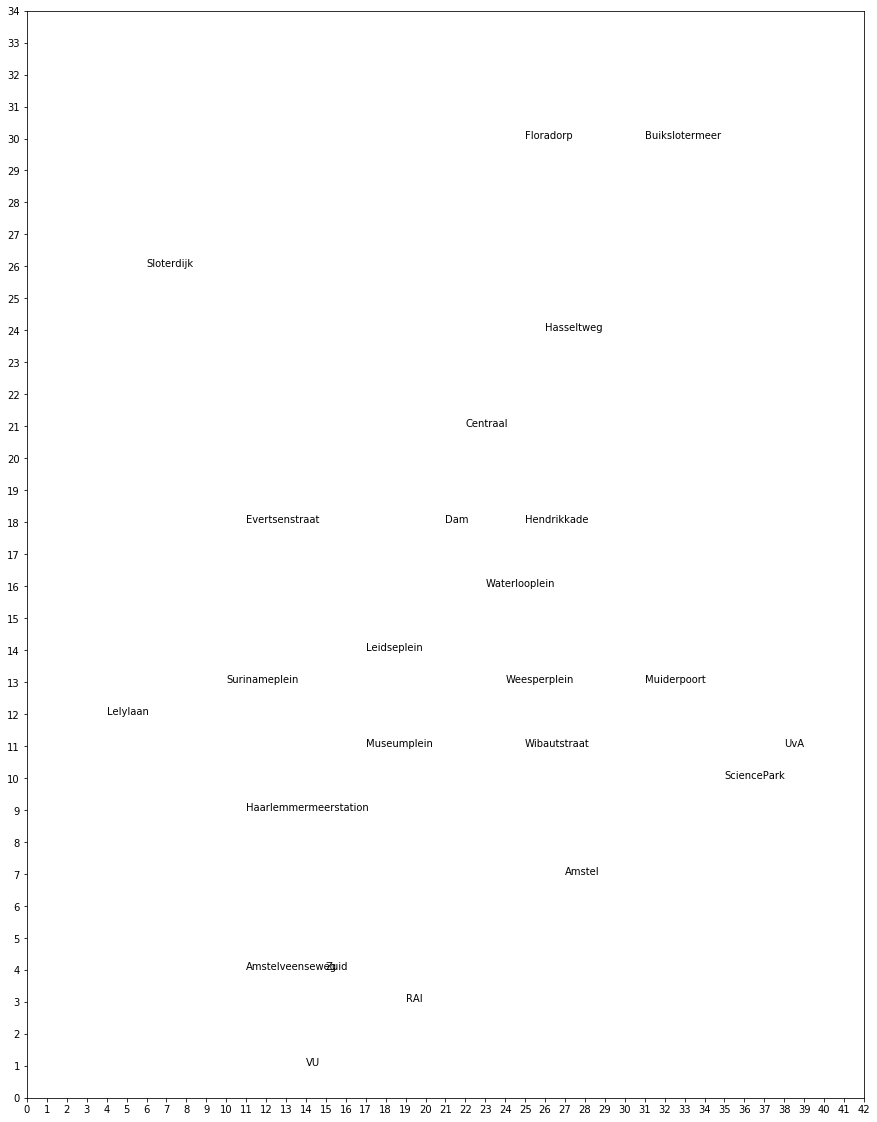

In [11]:
plt.figure(figsize=(15, 20))
maxx = 0
maxy = 0
for loc, (x, y) in coords.items():
    print(x, y)
    plt.text(x, y, loc)
    
    maxx = max(maxx, x)
    maxy = max(maxy, y)
    
plt.xticks(range(0, maxx + 5))
plt.yticks(range(0, maxy + 5))

plt.show()

In [12]:
import math

In [16]:
def distance(a, b):
    (x1, y1) = coords[a]
    (x2, y2) = coords[b]
    
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [17]:
edges_list = [("Amstel", "RAI"),("Amstel", "Wibautstraat"),("Amstel", "SciencePark"),("Amstelveenseweg", "Zuid"),
              ("Amstelveenseweg", "VU"),("Amstelveenseweg", "Haarlemmermeerstation"),("Amstelveenseweg", "Lelylaan"),
              ("Buikslotermeer", "Hasseltweg"),("Centraal", "Sloterdijk"),("Centraal", "Dam"),
              ("Centraal", "Waterlooplein"),("Centraal", "Hendrikkade"),("Dam", "Evertsenstraat"),
              ("Dam", "Leidseplein"),("Evertsenstraat", "Leidseplein"),("Evertsenstraat", "Sloterdijk"),
              ("Evertsenstraat", "Surinameplein"),("Floradorp", "Hasseltweg"),
              ("Haarlemmermeerstation", "Museumplein"),("Haarlemmermeerstation", "Surinameplein"),
              ("Hasseltweg", "Hendrikkade"),("Hendrikkade", "Waterlooplein"),("Leidseplein", "Weesperplein"),
              ("Leidseplein", "Museumplein"),("Leidseplein", "Surinameplein"),("Lelylaan", "Sloterdijk"),
              ("Lelylaan", "Surinameplein"),("Muiderpoort", "SciencePark"),("Muiderpoort", "Wibautstraat"),
              ("Muiderpoort", "Waterlooplein"),("Museumplein", "Wibautstraat"),("Museumplein", "Zuid"),
              ("RAI", "Zuid"),("SciencePark", "UvA"),("VU", "Zuid"),("Waterlooplein", "Weesperplein"),
              ("Weesperplein", "Wibautstraat")]
len(edges_list)

37

In [18]:
ams = nx.Graph()

    
# edges = []
# edges.append(("Amstel", "RAI"))
# edges.append(("Amstel", "Wibautstraat"))
# edges.append(("Amstel", "SciencePark"))

# edges.append(("Amstelveenseweg", "Zuid"))
# edges.append(("Amstelveenseweg", "VU"))
# edges.append(("Amstelveenseweg", "Haarlemmermeerstation"))
# edges.append(("Amstelveenseweg", "Lelylaan"))

# edges.append(("Buikslotermeer", "Hasseltweg"))

# edges.append(("Centraal", "Sloterdijk"))
# edges.append(("Centraal", "Dam"))
# edges.append(("Centraal", "Waterlooplein"))
# edges.append(("Centraal", "Hendrikkade"))

# edges.append(("Dam", "Evertsenstraat"))
# edges.append(("Dam", "Leidseplein"))

# edges.append(("Evertsenstraat", "Leidseplein"))
# edges.append(("Evertsenstraat", "Sloterdijk"))
# edges.append(("Evertsenstraat", "Surinameplein"))

# edges.append(("Floradorp", "Hasseltweg"))

# edges.append(("Haarlemmermeerstation", "Museumplein"))
# edges.append(("Haarlemmermeerstation", "Surinameplein"))

# edges.append(("Hasseltweg", "Hendrikkade"))

# edges.append(("Hendrikkade", "Waterlooplein"))

# edges.append(("Leidseplein", "Weesperplein"))
# edges.append(("Leidseplein", "Museumplein"))
# edges.append(("Leidseplein", "Surinameplein"))


# edges.append(("Lelylaan", "Sloterdijk"))
# edges.append(("Lelylaan", "Surinameplein"))

# edges.append(("Muiderpoort", "SciencePark"))
# edges.append(("Muiderpoort", "Wibautstraat"))
# edges.append(("Muiderpoort", "Waterlooplein"))

# edges.append(("Museumplein", "Wibautstraat"))
# edges.append(("Museumplein", "Zuid"))

# edges.append(("RAI", "Zuid"))

# edges.append(("SciencePark", "UvA"))

# edges.append(("VU", "Zuid"))

# edges.append(("Waterlooplein", "Weesperplein"))

# edges.append(("Weesperplein", "Wibautstraat"))

for src, dest in edges_list:
    ams.add_edge(src, dest, weight=distance(src, dest))

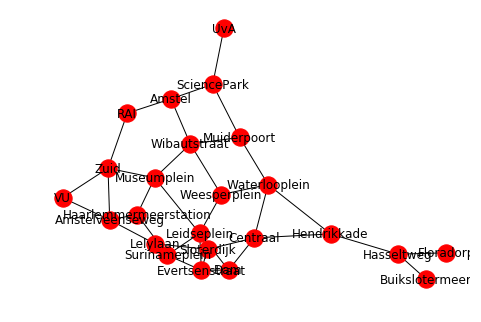

In [20]:
nx.draw(ams, with_labels=True)

In [21]:
demand_set = collections.defaultdict(set)

for index, row in df.iterrows():
    source = row["FROM"]
    for dest in locations:
        if row[dest] == 0:
            continue
        demand_set[source].add(dest)
for key, ss in demand_set.items():
    print(key, len(ss))

Haarlemmermeerstation 24
Dam 24
UvA 24
SciencePark 24
Weesperplein 24
Leidseplein 24
Surinameplein 24
Waterlooplein 24
Hendrikkade 24
Amstel 24
Sloterdijk 24
Centraal 24
RAI 24
Wibautstraat 24
Lelylaan 24
Floradorp 24
Museumplein 24
Buikslotermeer 24
Hasseltweg 24
Zuid 24
Amstelveenseweg 24
VU 24
Evertsenstraat 24
Muiderpoort 24


In [22]:
# (point1, point2) -> traffic (points are ordered alphabetically - we don't care about order)
traffic = collections.defaultdict(int)
for index, row in df.iterrows():
    source = row["FROM"]
    for dest in locations:
        if row[dest] == 0:
            continue
        key = tuple(sorted([source, dest]))
        traffic[key] += row[dest]

traffic = list(traffic.items())
traffic.sort(key = lambda _: -_[1])
traffic[:100]

[(('Centraal', 'Leidseplein'), 303),
 (('Centraal', 'UvA'), 293),
 (('Centraal', 'Haarlemmermeerstation'), 289),
 (('Centraal', 'Dam'), 283),
 (('Centraal', 'Museumplein'), 265),
 (('Centraal', 'VU'), 264),
 (('Centraal', 'SciencePark'), 261),
 (('Centraal', 'Zuid'), 261),
 (('Centraal', 'Sloterdijk'), 261),
 (('Museumplein', 'Zuid'), 254),
 (('Museumplein', 'VU'), 252),
 (('Haarlemmermeerstation', 'Museumplein'), 249),
 (('Amstel', 'Centraal'), 248),
 (('Dam', 'Museumplein'), 246),
 (('Sloterdijk', 'Zuid'), 245),
 (('Haarlemmermeerstation', 'UvA'), 243),
 (('Leidseplein', 'VU'), 243),
 (('Leidseplein', 'Sloterdijk'), 240),
 (('Haarlemmermeerstation', 'Zuid'), 240),
 (('SciencePark', 'Zuid'), 237),
 (('Sloterdijk', 'UvA'), 237),
 (('Centraal', 'Lelylaan'), 236),
 (('Haarlemmermeerstation', 'Leidseplein'), 236),
 (('RAI', 'UvA'), 235),
 (('UvA', 'VU'), 233),
 (('Haarlemmermeerstation', 'VU'), 232),
 (('Leidseplein', 'RAI'), 231),
 (('Sloterdijk', 'VU'), 231),
 (('RAI', 'Zuid'), 230),
 (

In [23]:
def n_slices(n, list_):
    for i in range(len(list_) + 1 - n):
        yield list_[i:i+n]

def is_sublist(list_, sub_list):
    for slice_ in n_slices(len(sub_list), list_):
        if slice_ == sub_list:
            return True
    return False


In [24]:
sorted_by_len = sorted(traffic, key = lambda _: -len(nx.shortest_path(ams, _[0][0], _[0][1])))

In [25]:
routes = []
for (d1, d2), tr in sorted_by_len:
    shortest_path = nx.shortest_path(ams, d1, d2)
    extant = False
    for r1, r2 in routes:
        if is_sublist(r1, shortest_path) or is_sublist(r2, shortest_path):
            extant = True
            break
    
    # add route only if not already covered
    if extant:
        continue
    routes.append((shortest_path, shortest_path[::-1]))

routes    

[(['Floradorp',
   'Hasseltweg',
   'Hendrikkade',
   'Centraal',
   'Sloterdijk',
   'Lelylaan',
   'Amstelveenseweg',
   'Zuid'],
  ['Zuid',
   'Amstelveenseweg',
   'Lelylaan',
   'Sloterdijk',
   'Centraal',
   'Hendrikkade',
   'Hasseltweg',
   'Floradorp']),
 (['Floradorp',
   'Hasseltweg',
   'Hendrikkade',
   'Waterlooplein',
   'Weesperplein',
   'Leidseplein',
   'Surinameplein',
   'Haarlemmermeerstation'],
  ['Haarlemmermeerstation',
   'Surinameplein',
   'Leidseplein',
   'Weesperplein',
   'Waterlooplein',
   'Hendrikkade',
   'Hasseltweg',
   'Floradorp']),
 (['Floradorp',
   'Hasseltweg',
   'Hendrikkade',
   'Centraal',
   'Sloterdijk',
   'Lelylaan',
   'Amstelveenseweg',
   'VU'],
  ['VU',
   'Amstelveenseweg',
   'Lelylaan',
   'Sloterdijk',
   'Centraal',
   'Hendrikkade',
   'Hasseltweg',
   'Floradorp']),
 (['Buikslotermeer',
   'Hasseltweg',
   'Hendrikkade',
   'Centraal',
   'Sloterdijk',
   'Lelylaan',
   'Amstelveenseweg',
   'Zuid'],
  ['Zuid',
   'Amstelv

In [26]:
routes = [r[0] for r in routes]
len(routes)

56

In [27]:
routes

[['Floradorp',
  'Hasseltweg',
  'Hendrikkade',
  'Centraal',
  'Sloterdijk',
  'Lelylaan',
  'Amstelveenseweg',
  'Zuid'],
 ['Floradorp',
  'Hasseltweg',
  'Hendrikkade',
  'Waterlooplein',
  'Weesperplein',
  'Leidseplein',
  'Surinameplein',
  'Haarlemmermeerstation'],
 ['Floradorp',
  'Hasseltweg',
  'Hendrikkade',
  'Centraal',
  'Sloterdijk',
  'Lelylaan',
  'Amstelveenseweg',
  'VU'],
 ['Buikslotermeer',
  'Hasseltweg',
  'Hendrikkade',
  'Centraal',
  'Sloterdijk',
  'Lelylaan',
  'Amstelveenseweg',
  'Zuid'],
 ['Floradorp',
  'Hasseltweg',
  'Hendrikkade',
  'Waterlooplein',
  'Weesperplein',
  'Wibautstraat',
  'Amstel',
  'RAI'],
 ['Buikslotermeer',
  'Hasseltweg',
  'Hendrikkade',
  'Centraal',
  'Sloterdijk',
  'Lelylaan',
  'Amstelveenseweg',
  'VU'],
 ['Buikslotermeer',
  'Hasseltweg',
  'Hendrikkade',
  'Waterlooplein',
  'Weesperplein',
  'Leidseplein',
  'Surinameplein',
  'Haarlemmermeerstation'],
 ['Buikslotermeer',
  'Hasseltweg',
  'Hendrikkade',
  'Waterlooplein'

In [28]:
l2i = dict(zip(sorted(locations), range(len(locations))))
for route in routes:
    route = list(map(lambda _: l2i[_], route))
    print(route)

[6, 8, 9, 3, 16, 11, 1, 23]
[6, 8, 9, 20, 21, 10, 17, 7]
[6, 8, 9, 3, 16, 11, 1, 19]
[2, 8, 9, 3, 16, 11, 1, 23]
[6, 8, 9, 20, 21, 22, 0, 14]
[2, 8, 9, 3, 16, 11, 1, 19]
[2, 8, 9, 20, 21, 10, 17, 7]
[2, 8, 9, 20, 21, 22, 0, 14]
[11, 1, 23, 14, 0, 15, 18]
[5, 10, 21, 22, 0, 15, 18]
[6, 8, 9, 20, 12, 15, 18]
[6, 8, 9, 20, 21, 10, 13]
[2, 8, 9, 20, 21, 10, 13]
[2, 8, 9, 20, 12, 15, 18]
[17, 10, 21, 22, 0, 15, 18]
[7, 13, 22, 0, 15, 18]
[16, 3, 20, 12, 15, 18]
[18, 15, 0, 14, 23, 19]
[4, 3, 20, 12, 15, 18]
[3, 16, 11, 1, 23, 14]
[10, 13, 22, 0, 15, 18]
[0, 14, 23, 1, 11, 16]
[5, 4, 3, 9, 8, 6]
[19, 23, 13, 10, 21, 20]
[2, 8, 9, 3, 4, 5]
[3, 4, 10, 17, 7]
[0, 22, 21, 20, 3]
[4, 10, 13, 23, 19]
[4, 10, 13, 23, 14]
[5, 17, 7, 1, 19]
[12, 22, 13, 23, 19]
[0, 22, 21, 10, 4]
[5, 10, 21, 20, 12]
[1, 23, 13, 10, 4]
[1, 23, 13, 22, 12]
[5, 10, 13, 23, 14]
[11, 16, 3, 20, 12]
[16, 5, 10, 13, 22]
[12, 20, 21, 10, 17]
[1, 11, 16, 3, 20]
[14, 23, 13, 10, 17]
[11, 1, 23, 13, 22]
[1, 23, 13, 10, 21]
[3, 